###Problem of the Perceptron
While the perceptron is a powerful and foundational tool in neural networks, it comes with limitations:

- Linear Separability: A perceptron can only classify linearly separable data. It struggles with problems where data points from different classes cannot be divided by a straight line (e.g., XOR problem).
- No Probabilistic Output: The perceptron’s output is binary (1 or 0), which doesn’t provide any probabilistic confidence in predictions.
- Hard Decision Boundary: It uses a step activation function, which introduces a non-differentiable point, making gradient-based optimization (like backpropagation) impossible for complex models.
- Convergence: The perceptron will only converge (reach an optimal solution) if the data is linearly separable.

To address some of these problems, loss functions and continuous activation functions are introduced in more advanced models (e.g., logistic regression, neural networks).

# Code of Perceptron Problem

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [9]:
or_data['x1'] = [1,1,0,0]
or_data['x2'] = [1,0,1,0]
or_data['y'] = [1,1,1,0]

In [8]:
and_data['x1'] = [1,1,0,0]
and_data['x2'] = [1,0,1,0]
and_data['y'] = [1,1,1,0]

In [7]:
xor_data['x1'] = [1,1,0,0]
xor_data['x2'] = [1,0,1,0]
xor_data['y'] = [1,1,1,0]

In [10]:
and_data

,x1,x2,y
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='x1', ylabel='x2'>

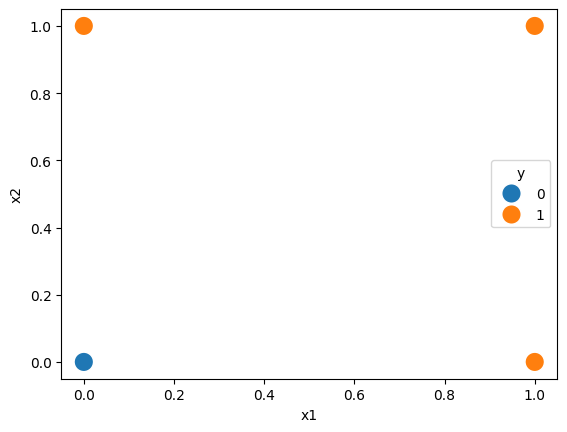

In [18]:
# Use the dataframe as the `data` parameter and specify columns for x, y, and hue
sns.scatterplot(data=and_data, x='x1', y='x2', hue='y', s=200)

In [19]:
or_data

,x1,x2,y
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='x1', ylabel='x2'>

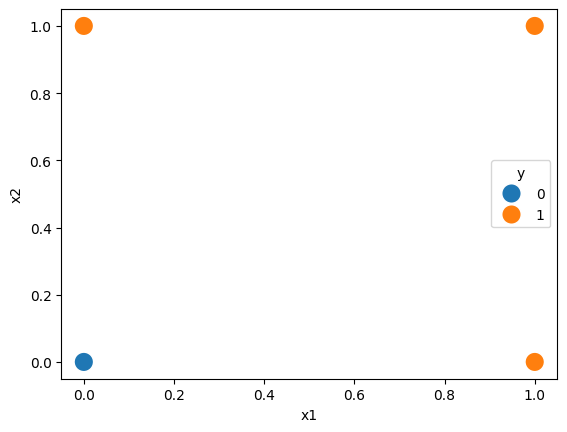

In [20]:
# Use the dataframe as the `data` parameter and specify columns for x, y, and hue
sns.scatterplot(data=or_data, x='x1', y='x2', hue='y', s=200)

In [12]:
xor_data

,x1,x2,y
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='x1', ylabel='x2'>

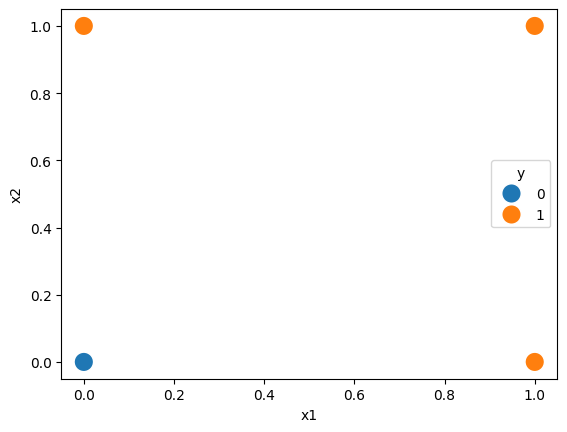

In [21]:
# Use the dataframe as the `data` parameter and specify columns for x, y, and hue
sns.scatterplot(data=xor_data, x='x1', y='x2', hue='y', s=200)

In [22]:
from sklearn.linear_model import Perceptron
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [23]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [24]:
print(clf1.coef_)
print(clf1.intercept_)

[[2. 2.]]
[-1.]


<Axes: xlabel='x1', ylabel='x2'>

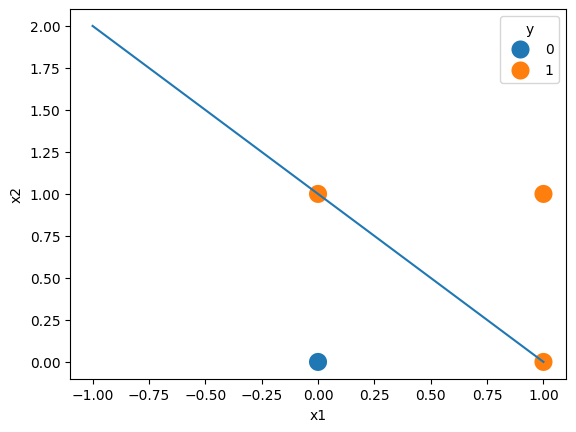

In [29]:
x=np.linspace(-1,1,5)
y=-x+1
plt.plot(x,y)
sns.scatterplot(data=and_data, x='x1', y='x2', hue='y', s=200)

In [26]:
print(clf2.coef_)
print(clf2.intercept_)

[[2. 2.]]
[-1.]


In [27]:
print(clf3.coef_)
print(clf3.intercept_)

[[2. 2.]]
[-1.]


<Axes: >

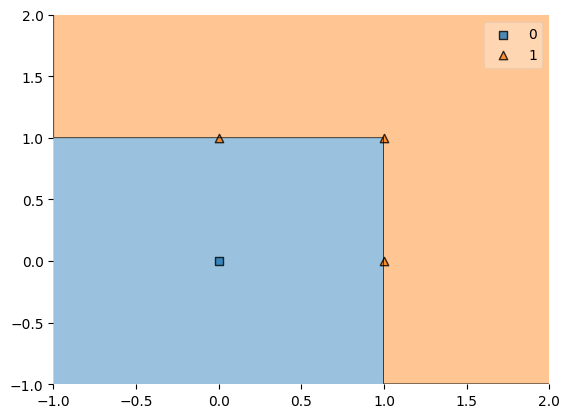

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=xor_data.iloc[:,0:2].values, y=xor_data.iloc[:,-1].values, clf=clf3)

###Perceptron Loss Function
A loss function measures how well the perceptron is performing by comparing its predictions with the actual target values (labels). The goal during training is to minimize the loss function to improve the model's performance.

For perceptrons, the Perceptron Loss Function (also called hinge loss) is used to update weights:

 - Loss = -y * ((w^T) * x + b)

Where:
 - y is the true label (+1 or -1),
 - w is the weight vector,
 - x is the input feature vector, and
 - b is the bias.
This loss function only applies to misclassified points. When a point is correctly classified, the loss is zero.

###Explanation of Perceptron Loss Function
 - The goal is to maximize the margin between the decision boundary and the nearest points in the training set.
 - If a point is misclassified, the loss is positive, indicating that the weights should be updated to reduce this error.
 - If a point is correctly classified, the loss is zero, so no weight updates are made.

How the Loss Function Works:

 - If 𝑦 * ((𝑤^𝑇) * 𝑥 + 𝑏 ) ≥ 0: The point is correctly classified, so no loss.
 - If 𝑦 * ((𝑤^𝑇) * 𝑥 + 𝑏 ) < 0: The point is misclassified, and the loss is proportional to how far the point is from the decision boundary.

Thus, the perceptron loss function penalizes the model only when it makes mistakes, and the magnitude of the penalty depends on how badly the point is misclassified.

###Limitations of the Perceptron Loss Function:
- The perceptron loss function is not differentiable, making it unsuitable for gradient-based methods like backpropagation in deeper neural networks.
- It does not provide a margin of confidence in its predictions. More advanced models like support vector machines (SVM) address this by using a hinge loss with margin maximization.

##Coding: Perceptron with Loss Function

In [33]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,
                           random_state=41,hypercube=False,class_sep=15)

In [34]:
X.shape

(100, 2)

In [35]:
y.shape

(100,)

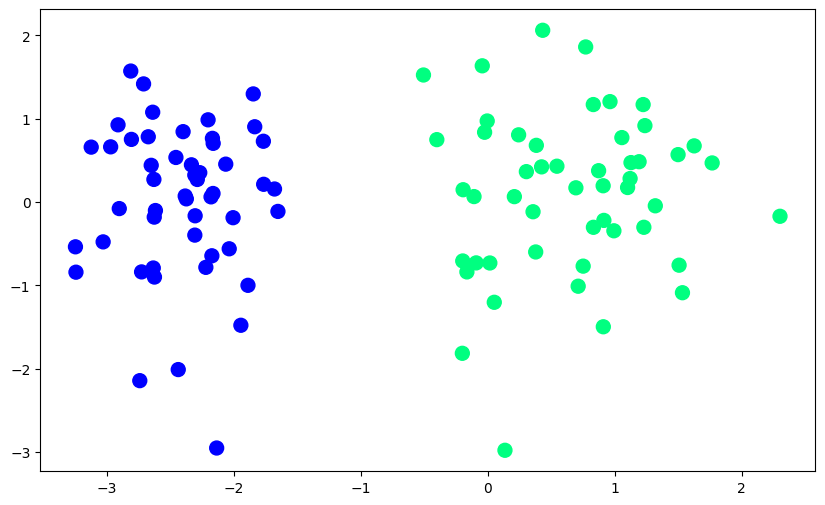

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [37]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [38]:
w1,w2,b = perceptron(X,y)

In [39]:
b

1.3000000000000003

In [40]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

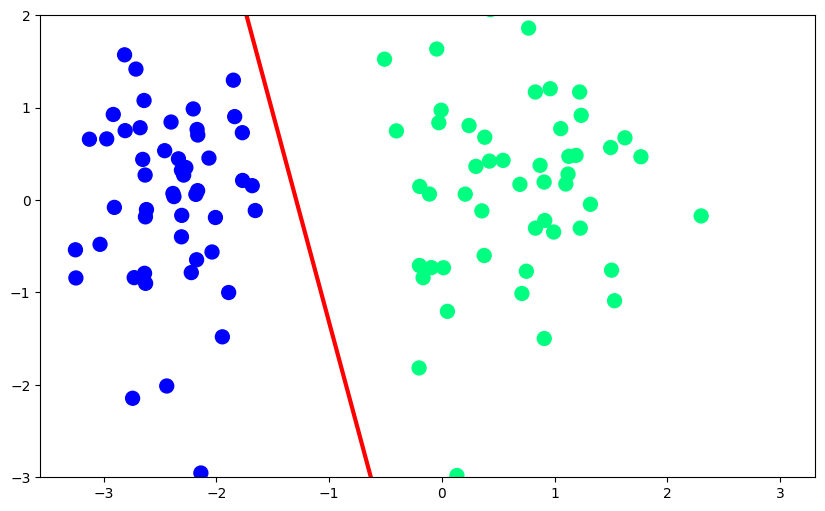

In [41]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)